# <font color="blue"> **Graph theory in neuronal network analysis** </font>
<figure>
    <img src="https://mcgovern.mit.edu/wp-content/uploads/2021/10/brainmap_900x600.jpg" alt="Connectome" width="300"/>
</figure>


Notebook prepared for the:
<blockquote>

**Workshop - Introduction to Computational Neuroscience**

**Neurasmus : European Master in Neuroscience**

2024 July 3rd - 6th, Amsterdam, Netherlands
</blockquote>


**Authors:**
* Patrick Desrosiers
* Zahra Yazdani


**Introduction:**

Network science has significantly advanced neuroscience by enabling the detailed analysis of brain connectivity through the use of mathematical models called graphs ([Basset et al. 2017](https://doi.org/10.1038/nn.4502)).  Those models have been pivotal in examining brain dynamics, neurodevelopment, and in the application of control theory to predict and influence brain state transitions, leading to potential new therapeutic strategies ([Barabási et al. 2023](https://doi.org/10.1523/JNEUROSCI.1014-23.2023)).

Here, using the Python library [NetworkX](https://networkx.org/), we will:
* explore graph representations,
* analyze graph features,
* simulate synthetic connectomes,
* simulate neuronal activity,
* compare functional and structural connectomes.





## <font color="blue"> **1. Graphs** </font>

### <font color="black"> **1.1 Definitions** </font>

A graph is a mathematical structure used to model pairwise relations between objects. It is composed of two main components:

1. **Vertices (or Nodes):** These are the fundamental units or points in the graph. Each vertex can represent various entities such as people in a social network, web pages on the internet, or neurons in a brain network.

2. **Edges (or Links):** These are the connections between pairs of vertices. An edge can represent a relationship, interaction, or a direct connection between two vertices. Edges can be undirected (no direction, indicating a mutual relationship) or directed (with direction, indicating a one-way relationship).

<figure>
    <img src="https://networkx.org/documentation/stable/_images/sphx_glr_plot_simple_graph_001.png" alt="Simple graph" width="300"/>
    <figcaption>Figure 1: Simple Graph with $N=5$ vertices, $M=6$ edges, and density 0.6.  </figcaption>
</figure>

Graph theory provides a rich set of tools and metrics to analyze these networks, such as connectivity patterns, network robustness, efficiency of information transfer, and centrality measures. This analysis helps to uncover the underlying architecture of brain networks and their role in neural function.

One of the basic features of a graph is its overall connectivity or **density**, measured as the ratio of the number of edges present to the number of possible edges between nodes in the graph:

$$
\text{density} = \frac{\text{number of edges}}{\text{number of possible edges}}=\frac{2M}{N(N-1)},
$$

where $M$ and $N$ denote the number of edges and nodes, respectively.

Types of Graphs:

- **Undirected Graph:** A graph in which edges have no direction. If vertex A is connected to vertex B, then vertex B is also connected to vertex A.
- **Directed Graph (Digraph):** A graph in which edges have a direction. An edge from vertex A to vertex B does not imply an edge from vertex B to vertex A.
- **Weighted Graph:** A graph in which each edge has a numerical value (weight) associated with it. This can represent distances, costs, or other quantities.
- **Unweighted Graph:** A graph in which all edges are considered equal, with no specific weight assigned to them.

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/graph_types.png" alt="Connectome" width="800"/>
</figure>


For simplicity, we will focus on undirected graphs, starting with unweighted graphs, and then introduce weights.

### **1.2 NetworkX**
NetworkX is a Python library used for the creation, manipulation, and study of complex networks and graphs. It provides tools for analyzing the structure and dynamics of networks, offering various algorithms for network analysis and a wide range of built-in graph layouts for visualization.

In [1]:
# Load module for working with graphs
import networkx as nx

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
nx.density(G)

# Count nodes and edges, and measure density
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network Density: {density:.3f}")

Number of nodes: 5
Number of edges: 6
Network Density: 0.600


#### 1.2.1 Visual display

NetworkX offers many possibilities for displaying graphs, each with its own advantages and limitations.

- **Random Layout**: Positions nodes randomly in the graph space, providing a quick and unstructured visualization. *Advantage*: Simple and fast to compute. *Limitation*: Can be cluttered and lacks meaningful structure.
- **Circular Layout**: Arranges nodes in a circle, highlighting the overall structure and making it easy to identify certain types of symmetries and clusters. *Advantage*: Clearly shows node distribution and symmetrical patterns. *Limitation*: Can be less informative for large or complex networks.
- **Force-Directed (Spring) Layout**: Models the graph using repulsive forces between nodes and attractive forces along edges, similar to charged particles and springs. Nodes are iteratively adjusted until the system reaches equilibrium, minimizing edge crossings and distributing nodes evenly. *Advantage*: Provides an intuitive visualization that highlights clusters and relationships. *Limitation*: Computationally intensive for large graphs.

Here is a random layout of the previously defined graph using NetworkX functions `nx.random_layout`, `nx.draw_networkx_nodes` , `nx.draw_networkx_edges` .

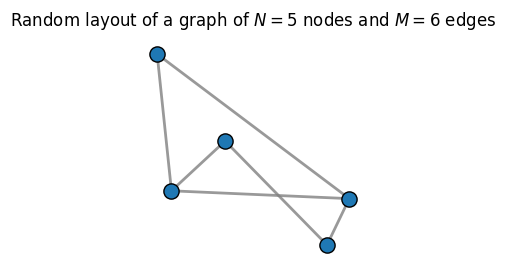

In [2]:
# Load module for plotting and visualization
import matplotlib.pyplot as plt

# Random layout
plt.figure(figsize=(3,3))
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=120, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey', width=2.0)
plt.title('Random layout of a graph of $N=5$ nodes and $M=6$ edges')
plt.axis('off')
plt.show()


Below, we will randomly generate a graph $N=12$ nodes and $M=28$ edges using `nx.gnm_random_graph` and then visualize the graph them in three different ways.

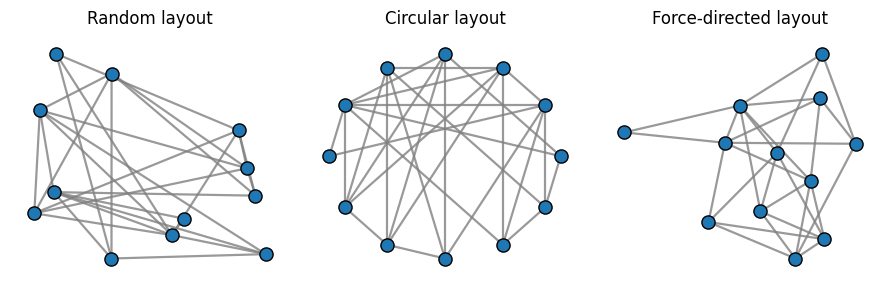

In [3]:
# Draw randomly a graph
N = 12
M = 28
G = nx.gnm_random_graph(N, M, directed= False) # If directed = True, then the graph is directed

# Plot the graph with different layouts
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Random layout
pos = nx.random_layout(G)
axs[0].set_title('Random layout')
nx.draw_networkx_nodes(G, pos, ax=axs[0], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[0], alpha=0.8, edge_color='grey', width=1.6)
axs[0].axis('off')

# Circular layout
pos = nx.circular_layout(G)
axs[1].set_title('Circular layout')
nx.draw_networkx_nodes(G, pos, ax=axs[1], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[1], alpha=0.8, edge_color='grey', width=1.6)
axs[1].axis('off')

# Force-directed layout
pos = nx.spring_layout(G, k=0.75)  # Smaller k value for more repulsion
axs[2].set_title('Force-directed layout')
nx.draw_networkx_nodes(G, pos, ax=axs[2], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[2], alpha=0.8, edge_color='grey', width=1.6)
axs[2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()


These visual representations are all **geometrically different**, but they are **topologically equivalent** since they preserve the exact pattern of connections between the nodes.

#### 1.2.2 Matrix Representation

An **adjacency matrix** is a square matrix used to represent a graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. Given a graph $G$ with $N$ vertices, its adjacency matrix $ A $ is a $ N \times N $ matrix whose entry in the $i$-th row and $j$-th column, denoted $A_{ij}$,  is be defined as:
$$
A_{ij} =
\begin{cases}
1 & \text{if there is an edge between vertex } i \text{ and vertex } j, \\
0 & \text{otherwise.}
\end{cases}
$$
For undirected graphs, since the edge between vertex $i$ and vertex $j$ is the same as between vertex $j$ and vertex $i$, the matrix is symmetric:
$$
A_{ij} = A_{ji}.
$$


For instance, the adjacency matrix corresponding to the graph in Figure 1 is written as:
$$
A = \begin{pmatrix}
0 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$
This matrix shows a '1' wherever there is a direct connection between nodes, and '0' otherwise. The matrix is symmetric, indicating that the graph is undirected.

In [4]:
# Load library for numerical analysis
import numpy as np

# Get the adjacency matrix as a SciPy sparse matrix
A = nx.adjacency_matrix(G)

# Convert it to a NumPy array if you prefer working with NumPy
A = A.toarray()
print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 1 1 0 0 1 1 1]
 [0 1 0 0 1 1 0 1 1 0 1 0]
 [1 0 0 0 0 1 0 1 1 1 0 0]
 [0 0 1 0 0 0 0 1 1 1 0 1]
 [1 1 1 1 0 0 1 1 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 1 0 0 0]
 [0 0 1 1 1 0 0 1 0 1 0 0]
 [0 1 0 1 1 0 0 0 1 0 0 0]
 [0 1 1 0 0 1 0 0 0 0 0 1]
 [1 1 0 0 1 0 0 0 0 0 1 0]]


We will now modify the last example to assign a weight to each edge, hence modifying its adjacency matrix. We will then visualize weights using edge thickness.

In [5]:
# Assign random weights to each edge
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Get the adjacency matrix as a NumPy array
A = (nx.adjacency_matrix(G)).toarray()

print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0.         0.         0.         0.8972582  0.         0.28195769
  0.         0.         0.         0.         0.         0.6517458 ]
 [0.         0.         0.18721734 0.         0.         0.56003892
  0.87919447 0.         0.         0.40625765 0.29597693 0.40398381]
 [0.         0.18721734 0.         0.         0.79018395 0.54423821
  0.         0.94673966 0.9280447  0.         0.13312095 0.        ]
 [0.8972582  0.         0.         0.         0.         0.94909711
  0.         0.01179956 0.29652772 0.37047075 0.         0.        ]
 [0.         0.         0.79018395 0.         0.         0.
  0.         0.02625131 0.46341925 0.21995713 0.         0.26249097]
 [0.28195769 0.56003892 0.54423821 0.94909711 0.         0.
  0.36856649 0.81245258 0.         0.         0.65309274 0.        ]
 [0.         0.87919447 0.         0.         0.         0.36856649
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.94673966 0.0

#### 1.2.3 Visualization of weighted and directed graphs

We first go back to the previous example where the graph is weighted and represent the weights using the thickness of the edges.

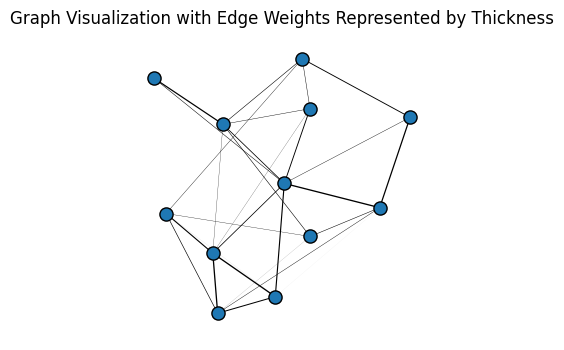

In [6]:
## Visualize the weighted graph
plt.figure(figsize=(4,4))

# Extract weights for visualization
weights = 40*[G[u][v]['weight'] for u, v in G.edges()]

# Draw the graph with edge thickness corresponding to weights
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=90, edgecolors='black', linewidths=1)

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, width=weights)

plt.title("Graph Visualization with Edge Weights Represented by Thickness")
plt.axis('off')
plt.show()

In all revious examples, graph were undirected. We now randomly selected a directed graph with a given number of vertices and edges. We also randomly attribute a weight to each edge.

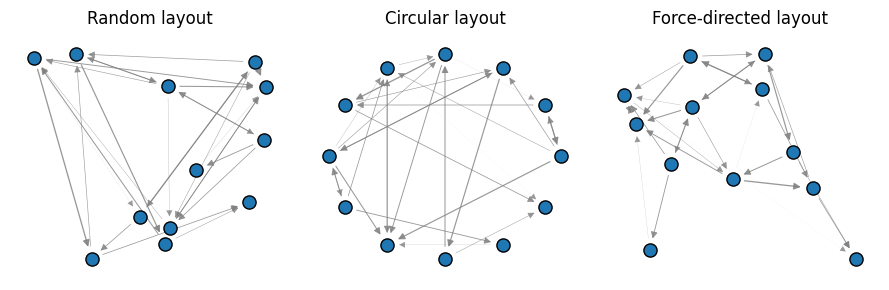

In [7]:
# Draw randomly a directed graph (digraph)
N = 12
M = 28
G = nx.gnm_random_graph(N, M, directed= True)

# Assign random weights to each edge
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Extract weights for visualization
weights = 40*[G[u][v]['weight'] for u, v in G.edges()]

# Plot the graph with different layouts
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Random layout
pos = nx.random_layout(G)
axs[0].set_title('Random layout')
nx.draw_networkx_nodes(G, pos, ax=axs[0], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[0], alpha=0.8, edge_color='grey', width=weights)
axs[0].axis('off')

# Circular layout
pos = nx.circular_layout(G)
axs[1].set_title('Circular layout')
nx.draw_networkx_nodes(G, pos, ax=axs[1], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[1], alpha=0.8, edge_color='grey', width=weights)
axs[1].axis('off')

# Force-directed layout
pos = nx.spring_layout(G, k=0.75)  # Smaller k value for more repulsion
axs[2].set_title('Force-directed layout')
nx.draw_networkx_nodes(G, pos, ax=axs[2], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[2], alpha=0.8, edge_color='grey', width=weights)
axs[2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

Below, we illustrate the adjacency matrix and show that it's not symmetric.

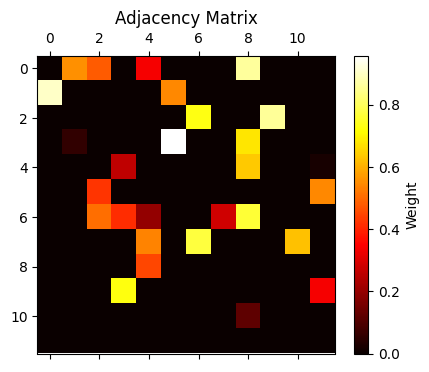


Adjacency matrix is symmetric: False


In [8]:
# Compute and plot the adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Plot the adjacency matrix
plt.matshow(adj_matrix, cmap='hot')
plt.title('Adjacency Matrix')
plt.colorbar(label='Weight',shrink=0.8)
plt.show()

# Check if the adjacency matrix is symmetric
is_symmetric = np.allclose(adj_matrix, adj_matrix.T, atol=1e-8)
print(f"\nAdjacency matrix is symmetric: {is_symmetric}")

In [9]:
adj_matrix

array([[0.        , 0.55422314, 0.47977888, 0.        , 0.33692385,
        0.        , 0.        , 0.        , 0.86038025, 0.        ,
        0.        , 0.        ],
       [0.9016478 , 0.        , 0.        , 0.        , 0.        ,
        0.5427064 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.72990288, 0.        , 0.        , 0.85760305,
        0.        , 0.        ],
       [0.        , 0.05910461, 0.        , 0.        , 0.        ,
        0.95701379, 0.        , 0.        , 0.67881286, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25907272, 0.        ,
        0.        , 0.        , 0.        , 0.63711341, 0.        ,
        0.        , 0.01911726],
       [0.        , 0.        , 0.42490417, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

## <font color="blue"> **2. Structural Connectomes** </font>

Structural connectomes are comprehensive maps that depict the physical or anatomical connections between different elements within the brain, whether they are neurons, groups of neurons, or large brain regions. These maps detail the neural pathways and synapses, providing a structural framework for understanding how different parts of the brain are wired and how they communicate with each other.

### **2.1 Relationship with graphs**
Structural connectomes are commonly represented as **graphs** in the field of network neuroscience. In this representation:

- **Vertices** (or nodes) represent the structural components of the brain, such as individual neurons, clusters of neurons, or whole brain regions, depending on the scale of the connectome.
- **Edges** (or links) represent the physical connections between these nodes, such as axonal pathways or white matter tracts.



### **2.2 Connectomes at different scales**

Structural connectomes exist at different scales of observation: microscopic connectomes detail individual neurons and their synapses to reveal intricate brain architecture, mesoscopic connectomes examine groups of neurons within specific regions to explore local network interactions, and macroscopic connectomes focus on major brain areas, analyzing how these regions are interconnected to support complex behaviors and cognitive functions.

1. **Microscopic Structural Connectomes**:
   - **Scale**: Individual neurons and their synaptic connections.
   - **Graph Representation**: Each node represents a single neuron, and each edge represents a synaptic connection between neurons.
   - **Purpose**: To explore the most detailed level of brain architecture and understand the direct synaptic pathways that underpin specific neural circuits and their functionalities.
   - **Species studied**: Caenorhabditis elegans ([White et al. 1986](https://doi.org/10.1098/rstb.1986.0056)),  Ciona intestinalis ([Ryan et al. 2016]( https://doi.org/10.7554/eLife.16962)), Platynereis dumerilii ([Verasztó et al. 2020](https://doi.org/10.1101/2020.08.21.260984)), Drosophila melanogaster([Scheffer et al. 2020](https://doi.org/10.7554/eLife.57443), [Winding et al. 2023](https://www.science.org/doi/10.1126/science.add9330), [Lin et al. 2024](https://www.biorxiv.org/content/10.1101/2023.07.29.551086v2)).

2. **Mesoscopic Structural Connectomes**:
   - **Scale**: Groups of neurons or neural circuits within specific brain regions.
   - **Graph Representation**: Nodes represent groups of neurons or neural circuits, and edges represent the neural pathways (e.g., bundles of axons) connecting these groups.
   - **Purpose**: To study how local networks interact within larger brain systems and to map the connectivity within specific functional areas or along specific sensory/motor pathways.
   - **Species studies**: Mouse ([Oh et al. 2014](https://doi.org/10.1038/nature13186)), Zebrafish ([Kunst et al. 2019](https://doi.org/10.1016/j.neuron.2019.04.034)), etc.

3. **Macroscopic Structural Connectomes**:
   - **Scale**: Major brain regions or areas.
   - **Graph Representation**: Nodes are large brain regions (like the cortex, thalamus, etc.), and edges represent major white matter tracts that connect these regions.
   - **Purpose**: To understand the high-level organization of the brain and how broad regions collaborate to support complex behaviors and cognitive processes.
   - **Species studied**: Human, primates, other mammels, etc.

Each level of these connectomes provides unique insights into the brain's structure and functionality, offering different perspectives from the finest details to the broadest interactions.

**Exercise:**

To explore specific connectomes, visit the [Netzschleuder network catalogue, repository, and centrifuge](https://networks.skewed.de/) and use 'connectome' as the keyword in the search engine.

### **2.3 The very first structural connectome: C. elegans**

The first complete connectome was mapped for *Caenorhabditis elegans* (C. elegans), a transparent roundworm used as a model organism in neurobiology. The project was led by John White, part of Sydney Brenner's team, who published their findings in 1986. This work detailed the synaptic connections of all 302 neurons in C. elegans, providing crucial insights into neural networks and behavior. The simplicity and genetic tractability of C. elegans make it ideal for such detailed study, setting a precedent for further connectome research in more complex organisms.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Caenorhabditis_elegans_hermaphrodite_adult-en.svg" alt="Caenorhabditis elegans hermaphrodite adult" width="300"/> ![Moving C. elegans](https://upload.wikimedia.org/wikipedia/commons/b/be/CrawlingCelegans.gif)

You can get the structural connectivity data as follows:

#### 2.3.1 Get data

Below, we connect to https://networks.skewed.de/net/celegansneural and extract the edge list for the C. elegans connectome. We then creat the correspondng directed graph in NetworkX.

In [10]:
import requests     # For making HTTP requests, used here to download the ZIP file from a URL
import zipfile      # For handling ZIP files, used here to extract contents from the downloaded ZIP file
import io           # Provides core tools for working with streams of data, used here for handling file content as a string
import pandas as pd # Provides data structures and data analysis tools, used here to work with tabular data (DataFrame)


# URL of the ZIP file
zip_url = "https://networks.skewed.de/net/celegansneural/files/celegansneural.csv.zip"

# Download the ZIP file
response = requests.get(zip_url)

# Check if the download was successful
if response.status_code == 200:
    # Extract the contents of the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # Check if 'edges.csv' exists in the ZIP file
        if 'edges.csv' in zf.namelist():
            # Open 'edges.csv' and read it into a Pandas DataFrame
            with zf.open('edges.csv') as csv_file:
                # Read CSV content as string
                csv_content = csv_file.read().decode('utf-8')

                # Split into lines
                lines = csv_content.splitlines()

                # Remove '# ' from the beginning of the first line
                if lines[0].startswith('# '):
                    lines[0] = lines[0][2:]

                # Join lines back into a single string
                csv_content_processed = '\n'.join(lines)

                # Read processed CSV content into DataFrame
                df_edges = pd.read_csv(io.StringIO(csv_content_processed), skipinitialspace=True)

                # Rename columns to remove leading spaces or characters
                df_edges.rename(columns={'# source': 'source', ' target': 'target', ' value': 'value'}, inplace=True)

        else:
            print("edges.csv not found in the ZIP file.")
else:
    print(f"Failed to download ZIP file. Status code: {response.status_code}")

# Display the DataFrame to verify
df_edges



,source,target,value
0,0,1,1
1,0,2,2
2,0,3,1
3,0,4,2
4,0,5,1
...,...,...,...
2354,292,44,1
2355,293,44,1
2356,294,44,1
2357,295,190,1


#### 2.3.2 Build graph and visual display in NetworkX

Number of nodes: 297
Number of edges: 2345


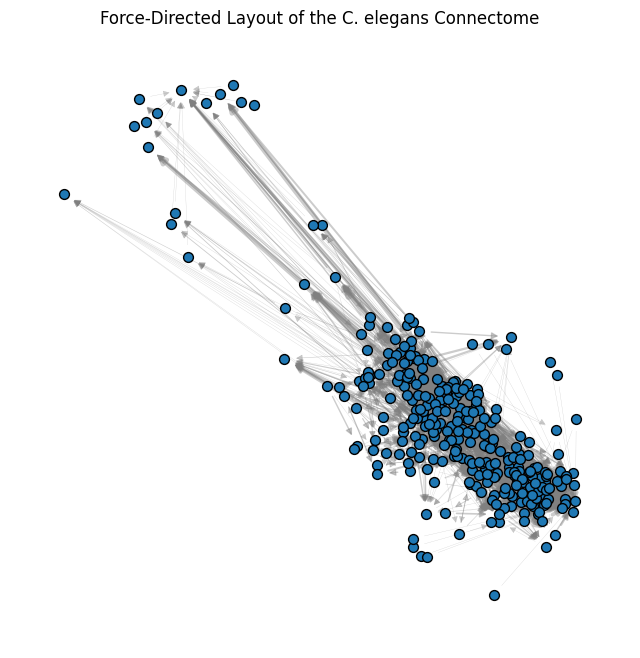

In [11]:
# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add edges from DataFrame
for _, row in df_edges.iterrows():
    source = int(row['source'])  # Convert to int assuming nodes are represented as integers
    target = int(row['target'])  # Convert to int assuming nodes are represented as integers
    weight = float(row['value'])  # Convert to float assuming weights are represented as floats

    G.add_edge(source, target, weight=weight)

# Count nodes and edges, measure density
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


# Extract edge weights
edge_weights = [0.2*G[u][v]['weight'] for u, v in G.edges()]

# Plot the graph with force-directed layout
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.2)  # Smaller k value for more repulsion
nx.draw_networkx_nodes(G, pos, node_size=50, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='grey', width=edge_weights )
plt.title('Force-Directed Layout of the C. elegans Connectome')
plt.axis('off')
plt.show()

After visualizing this connectome, we can appreciate the complexity and richness of its structure. Visualization provides an intuitive understanding of the network's architecture, revealing clusters, hubs, and potentially pathways. However, to systematically analyze and understand the functional and structural properties of this neural network, we need to move beyond visual inspection.

## <font color="blue"> **3. Graph Metrics** </font>

In network neuroscience, graph theory metrics (topological features or statistics) are essential for analyzing the structural and functional properties of neural networks. Below, we will explore the most commonly used metrics ([Rubinov & Sporns, 2010](https://doi.org/10.1016/j.neuroimage.2009.10.003), [Basset et al. 2017](https://doi.org/10.1038/nn.4502), [Zamani Esfahlani et al. 2022](https://doi.org/10.1038/s41467-022-29770-y)).

We now review some of the most relevant graph metrics and use them to characterize the C. elegans connectome.  

### **3.1 Density**

The density (a.k.a. connectectivity or connection probability) of a graph is a measure of how many edges are present relative to the total number of possible edges between its nodes.

In [12]:
density = nx.density(G)
print(f"Density: {density:.3f}")

Density: 0.027


Once the density is know, we can randomblu gererate graphs having the same connection probability using the called Erdös-Rényi model.  

Density of generated random graph G_random: 0.027



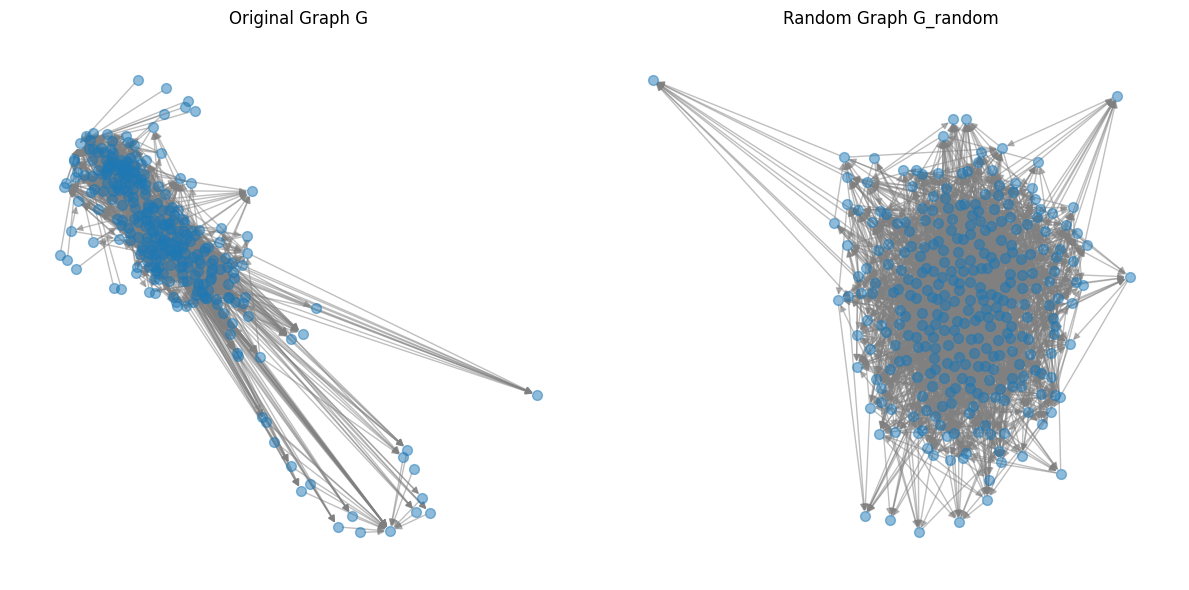

In [13]:
# Generate a random graph with the same number of nodes and density using ER model
N = G.number_of_nodes()  # Number of nodes in graph G
p = density  # Edge probability based on the density of G

# Generate ER random graph
G_random = nx.erdos_renyi_graph(N, p, directed=True)

# Calculate density of the generated random graph (optional check)
density_random = nx.density(G_random)
print(f"Density of generated random graph G_random: {density_random:.3f}\n")

# Plotting both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original graph G
axs[0].set_title('Original Graph G')
pos = nx.spring_layout(G, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G, pos, with_labels=False, edge_color='grey', node_size=50, ax=axs[0],
        alpha=0.5)

# Plot random graph G_random
axs[1].set_title('Random Graph G_random')
pos_random = nx.spring_layout(G_random, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G_random, pos_random, with_labels=False, edge_color='grey',
        node_size=50, ax=axs[1], alpha=0.5)

plt.tight_layout()
plt.show()

### **3.2 Transitivity (global clustering coefficient)**:

  - **Definition**: This metric measures the overall probability that the adjacent nodes of a node are connected, calculated as the ratio of the number of triangles to the number of connected triples of nodes.
  - **Relevance**: High transitivity indicates a strong tendency for nodes to form tightly knit groups, which can be critical for local information processing and robustness in neural networks.
  - **Expectation**: High transitivity is expected in brain connectomes, reflecting the presence of tightly knit groups or clusters that contribute to local processing and network robustness.
  - **Formula**: In an undirected graph, the global clustering coefficient is calculated as:
  $$
    C = \frac{3 \times \text{number of triangles}}{\text{number of connected triples of nodes}}
  $$

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/clustering.png" alt="Clustering" width="800"/>
</figure>

Below we check that the transitivity of the connectome is much higher than in a randomized version preserving density.

In [14]:
    # Compute  transitivity
    transitivity = nx.transitivity(G)
    print(f"Transitivity in the C. elegans SC: {transitivity}")


     # Compute transitivity in a random graph of same density
    transitivity = nx.transitivity(G_random)
    print(f"Transitivity in the C. elegans SC: {transitivity}")

Transitivity in the C. elegans SC: 0.1469370031398223
Transitivity in the C. elegans SC: 0.025800336983993262


### **3.3 Shortest path length**
   - **Definition**: The path length is the number of edges in the shortest path between two nodes. The average shostest path length (SPL) is the average of these shortest paths taken over all pairs of nodes in the graph.
   - **Relevance**: This measure helps in understanding the efficiency of information transfer across the network. Shorter average path lengths typically indicate more efficient global communication.
   - **Expectation**: In brain connectomes, shorter average path lengths are expected, indicating efficient communication pathways that facilitate rapid information transfer between distant brain regions.

"The figure below is a graph of $ N=8 $ nodes and $ M=13 $ edges. The purple lines indicate a possible path between nodes 1 and 8, while the magenta lines show the shortest path between these nodes, with a length of 4.

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/shortest-path-length.png" alt="Clustering" width="600"/>
</figure>

In a directed graph, the **average shortest path length** can only be computed inside a strongly connected component (SCC), which is subset of nodes where each node is reachable from every other node within this subset, considering the direction of the edges. Formally, a SCC in a directed graph $ G = (V, E) $ is a maximal subgraph $ G' = (V', E') $ such that for every pair of vertices $ u, v \in V' $, there exists a directed path from $ u $ to $ v $ and from $ v $ to $ u $ in $ G' $.





In [15]:
# Get the number of strongly connected components
num_scc = nx.number_strongly_connected_components(G)

print(f"Number of Strongly Connected Components: {num_scc}")

# Get all strongly connected components for directed graph (DiGraph)
components = list(nx.strongly_connected_components(G))

# Identify the largest strongly connected component
largest_scc = max(components, key=len)

# Create a subgraph for the largest strongly connected component
largest_scc_subgraph = G.subgraph(largest_scc)

# Number of nodes in the largest SCC
num_nodes_largest_scc = len(largest_scc)

print(f"Number of Nodes in the Largest SCC: {num_nodes_largest_scc}")

# Compute the average shortest path length within the largest SCC
if largest_scc_subgraph.number_of_nodes() > 1:
    avg_shortest_path_length = nx.average_shortest_path_length(largest_scc_subgraph)
    print(f"Average Shortest Path Length in the Largest SCC: {avg_shortest_path_length:.3f}")
else:
    print("The largest SCC has only one node, so average shortest path length is not defined.")

# Initialize a list to store average shortest path lengths of each component
avg_shortest_path_lengths = []

# Iterate over each strongly connected component
for component in components:
    # Create a subgraph induced by the nodes in the component
    subgraph = G.subgraph(component)

    # Check if the component has more than one node
    if len(subgraph) > 1:
        # Compute all-pairs shortest path lengths in the subgraph
        shortest_path_lengths = dict(nx.shortest_path_length(subgraph))

        # Calculate the average shortest path length for this component
        avg_shortest_path_length = sum(
            sum(length for length in path_lengths.values()) / (len(subgraph) - 1)
            for path_lengths in shortest_path_lengths.values()
        ) / len(subgraph)

        # Append the average shortest path length to the list
        avg_shortest_path_lengths.append(avg_shortest_path_length)

# Compute the overall average shortest path length
if avg_shortest_path_lengths:
    overall_avg_shortest_path_length = sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)
    print(f"Overall Average Shortest Path Length for Strongly Connected Components: {overall_avg_shortest_path_length:.3f}")
else:
    print("No strongly connected components found.")

Number of Strongly Connected Components: 57
Number of Nodes in the Largest SCC: 239
Average Shortest Path Length in the Largest SCC: 3.994
Overall Average Shortest Path Length for Strongly Connected Components: 1.998


**Network Efficiency**:
   - **Definition**: Global efficiency is the average inverse shortest path length in the network, and local efficiency is the efficiency of the subgraphs formed by the neighbors of each node.
   - **Relevance**: Efficiency metrics help in understanding the functional integration and fault tolerance of neural networks.
   - **Expectation**: High global and local efficiency are expected in brain connectomes, reflecting the need for effective integration of information and resilience to local disruptions.
  - **Formula**: Global efficiency $ E $ is calculated as:
  $$
    E  = \frac{1}{N(N-1)} \sum_{i \neq j \in G} \frac{1}{d_{ij}}
  $$
  where $ d_{ij} $ is the shortest path length between nodes $ i $ and $ j $.

In [16]:
# Compute network efficiency
G_undirected = nx.Graph(G)  # Convert to undirected graph
E = nx.global_efficiency(G_undirected)
print('Global efficiency of Zebrafish mesoscale SC:', E)

Global efficiency of Zebrafish mesoscale SC: 0.4448228531561982


### **3.4 Degrees**

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/degree_and_distribution.png" alt="Clustering" width="600"/>
</figure>

   - **Definition**: The degree of a node is the number of edges connected to it. In directed graphs, this can be divided into in-degree (incoming connections) and out-degree (outgoing connections).
   - **Relevance**: High-degree nodes may serve as important hubs in neural networks, potentially playing critical roles in neural processing and information dissemination.
   - **Expectation**: In brain connectomes, the degree distribution is often heterogeneous, with a **few nodes having very high degrees (hubs) and many nodes having low degrees**. This heterogeneity reflects the presence of hub nodes that are central to network communication and integration.


<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/connectome_degree_distribution.png" alt="Clustering" width="800"/>
</figure>

[Giacopelli et al. 2021](https://www.nature.com/articles/s41598-021-83759-z)


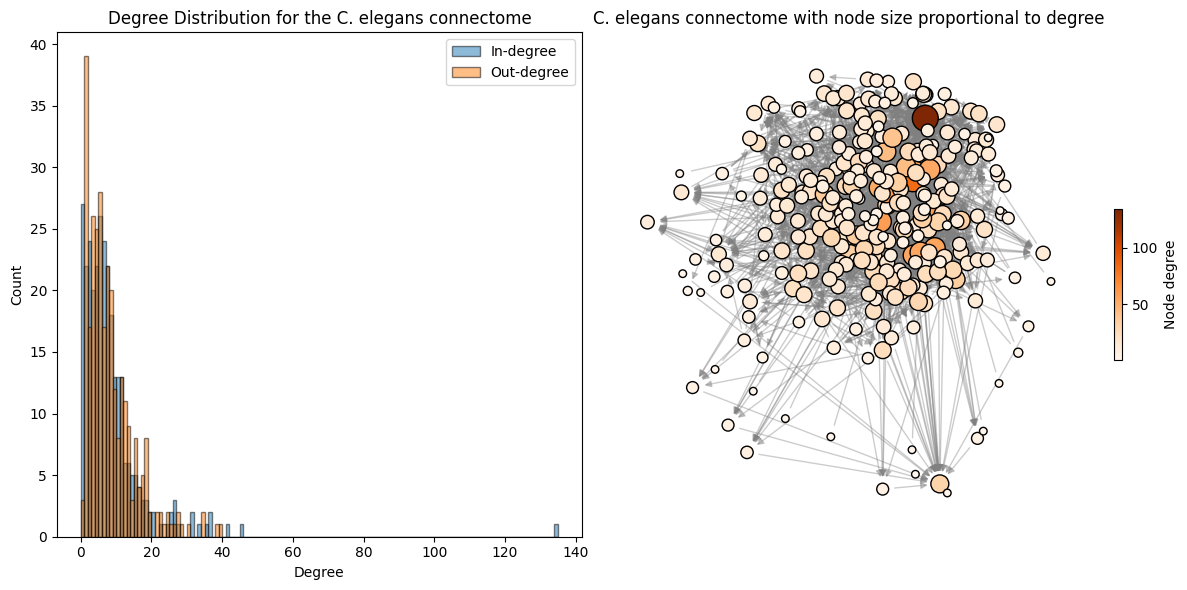

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Degrees
def degree_distribution(G, title, ax):
    """
    Plot the degree distribution of a directed graph.

    Parameters:
    - G: NetworkX graph (directed)
    - title: str, the title for the graph
    - ax: Matplotlib axis for the degree distribution
    """
    # In-degrees and out-degrees
    in_degree_sequence = [d for n, d in G.in_degree()]
    out_degree_sequence = [d for n, d in G.out_degree()]

    # Determine the bins
    bins = range(max(max(in_degree_sequence), max(out_degree_sequence)) + 2)  # Ensure all values are included

    # Plot Degree Distribution
    ax.hist(in_degree_sequence, bins=bins, alpha=0.5,
            density=False, edgecolor='black', label='In-degree')
    ax.hist(out_degree_sequence, bins=bins, alpha=0.5,
            density=False, edgecolor='black', label='Out-degree')
    ax.set_title(f'Degree Distribution for {title}')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Count')
    ax.legend()

def draw_graph_with_degree(G, title, ax):
    """
    Draw the directed graph with node sizes proportional to their degree.

    Parameters:
    - G: NetworkX graph (directed)
    - title: str, the title for the graph
    - ax: Matplotlib axis for the graph visualization
    """
    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.6)

    # Calculate node sizes based on degrees
    node_sizes = [30 * np.sqrt(d) for _, d in G.degree()]

    # Calculate node colors based on degrees
    node_degrees = np.asarray([G.degree(n) for n in G.nodes()])
    n_color = node_degrees

    # Draw nodes with sizes and colors based on their degree
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color=n_color, cmap='Oranges', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='grey', alpha=0.4)

    ax.set_title(f'{title} with node size proportional to degree')
    ax.axis('off')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=min(n_color), vmax=max(n_color)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, shrink=0.3)
    cbar.set_label('Node degree')

# Example usage with a directed graph G
# Assuming G is your directed NetworkX graph

# Create subplots for degree distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

degree_distribution(G, 'the C. elegans connectome', ax1)

# Create subplots for graph visualizations
draw_graph_with_degree(G, 'C. elegans connectome', ax2)

plt.tight_layout()
plt.show()


The folowing code check the general property according to which the sum of in-degrees is equal to the sum of out-degrees.

In [18]:
# In-degrees and out-degrees
in_degree_sequence = [d for n, d in G.in_degree()]
out_degree_sequence = [d for n, d in G.out_degree()]

total_in_degrees = sum(in_degree_sequence)
total_out_degrees = sum(out_degree_sequence)

print(f"Total In-Degrees: {total_in_degrees}")
print(f"Total Out-Degrees: {total_out_degrees}")


Total In-Degrees: 2345
Total Out-Degrees: 2345


Once the degrees are computed for each node, we get randomly draw graphs from models that are more realsitic than the Erdös-Rényi model.

- **Configuration Model**: Generates a random graph with a specified degree sequence, where each node's degree is assigned based on a given sequence, ensuring that nodes connect in a way that matches their specified degrees without introducing additional structural properties like clustering or community structure.

- **Directed Configuration Model**: Extends the configuration model to directed graphs, allowing the generation of random directed graphs with prescribed in-degree and out-degree sequences for each node, thereby maintaining the degree distribution while explicitly considering the directionality of edges in the graph.

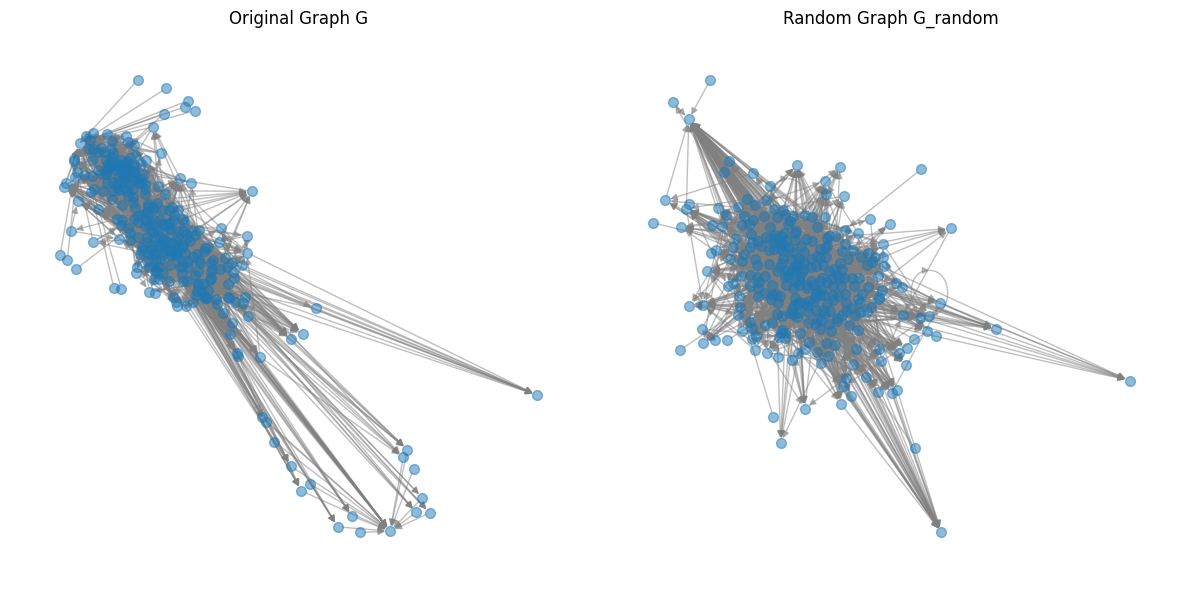

In [19]:
# Generate a random graph with the same degree sequences
G_random = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence, create_using=nx.DiGraph())


# Plotting both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original graph G
axs[0].set_title('Original Graph G')
pos = nx.spring_layout(G, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G, pos, with_labels=False, edge_color='grey', node_size=50, ax=axs[0],
        alpha=0.5)

# Plot random graph G_random
axs[1].set_title('Random Graph G_random')
pos_random = nx.spring_layout(G_random, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G_random, pos_random, with_labels=False, edge_color='grey',
        node_size=50, ax=axs[1], alpha=0.5)

plt.tight_layout()
plt.show()

### **3.5 Small-world property**

Typically, connectomes are **small-world**. In Network Science, a small-world graph is characterized by **high clustering** (transitivity) and **low average shortest path length**."

The small-worldness coefficient, often denoted as $\sigma$, quantitatively measures whether a network exhibits small-world properties. It is defined as the ratio of the normalized clustering coefficient and the normalized average shortest path length of a network, compared to those of a random network with similar size and degree distribution:
$$ \sigma = \frac{C/C_{rand}}{L/L_{rand}} $$
where:
- $ C $ is the clustering coefficient of the network.
- $ C_{rand} $ is the average clustering coefficient of a set of random networks with the same number of nodes and edges as the original network.
- $ L $ is the average shortest path length of the network.
- $ L_{rand} $ is the average shortest path length of the corresponding random networks.

A value of $\sigma > 1$ suggests that the network exhibits small-world properties, indicating a balance between high local clustering and short global path lengths compared to random networks. Note that $\sigma$ can only be computed for undirected graphs, so if the graph is directed, it must be first symmetrized before using the function `nx.sigma`.

In [20]:
# Function nx.sigma is too slow. New one defined below.
# # Create an undirected version of G
# G_undirected = nx.Graph(G)
# # Compute the small-worldness coefficient
# small_worldness = nx.sigma(G_undirected, niter=100, nrand=10, seed=None)
# # Print the result
# print(f"Small-worldness coefficient: {small_worldness}")


def small_worldness_coefficient(G, n_iter=32):
    """
    Compute the small-worldness coefficient sigma for a graph G.

    Parameters:
    - G: NetworkX graph
    - n_iter: Number of iterations for random graph generation

    Returns:
    - sigma: Small-worldness coefficient
    """
    # Warn and convert to undirected if needed
    if nx.is_directed(G):
        print("Warning: Graph was converted to undirected to compute small-worldness coefficient.")
        G = G.to_undirected()

    # Check if the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Computing for the largest connected component.")
        # Get the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    # Compute actual sigma
    n = G.number_of_nodes()
    m = G.number_of_edges()

    # Get degrees for the largest connected component
    degree_sequence = [d for n, d in G.degree()]

    # Calculate average shortest path length for the original graph
    L = nx.average_shortest_path_length(G)

    # Compute average shortest path length for configuration model instances
    L_random = 0
    for _ in range(n_iter):
        # Generate configuration model random graph
        G_random = nx.configuration_model(degree_sequence)

        # Convert to simple graph if G_random is a multigraph
        if G_random.is_multigraph():
            G_random = nx.Graph(G_random)

        # Check if the graph is connected
        if not nx.is_connected(G_random):
            print("Generated random graph is not connected. Skipping iteration.")
            continue

        L_random += nx.average_shortest_path_length(G_random) / n_iter

    # Calculate average clustering coefficient for the original graph
    try:
        C = nx.average_clustering(G)
    except nx.NetworkXError:
        print("Error computing average clustering coefficient for original graph.")
        C = 0

    # Compute average clustering coefficient for configuration model instances
    C_random = 0
    for _ in range(n_iter):
        # Generate configuration model random graph
        G_random = nx.configuration_model(degree_sequence)

        # Convert to simple graph if G_random is a multigraph
        if G_random.is_multigraph():
            G_random = nx.Graph(G_random)

        # Check if the graph is connected
        if not nx.is_connected(G_random):
            print("Generated random graph is not connected. Skipping iteration.")
            continue

        try:
            C_random += nx.average_clustering(G_random) / n_iter
        except nx.NetworkXError:
            print("Error computing average clustering coefficient for random graph.")
            continue

    # Compute sigma
    if L_random == 0 or C_random == 0:
        sigma = 0
    else:
        sigma = (C / C_random) / (L / L_random)

    return sigma


sigma = small_worldness_coefficient(G)
print(f"Small-worldness coefficient sigma: {sigma:.3f}")


Generated random graph is not connected. Skipping iteration.
Small-worldness coefficient sigma: 2.862


### **3.6 Motifs**

Detecting motifs in complex networks is challenging due to the computational complexity involved in searching for subgraph patterns efficiently. For more robust and scalable motif detection, alternative tools like `graph_tool` in Python offer advanced algorithms and optimizations beyond what is commonly available in NetworkX. Other packages like `igraph` and
`pymfinder` also provide efficient methods for motif discovery in large-scale networks.

### **3.7 Rich-Club Coefficient**
- **Definition**: This measures the tendency of high-degree nodes to be more densely interconnected than expected by chance.
- **Relevance**: In neural networks, a high rich-club coefficient among high-degree nodes suggests a "rich-club" architecture where hub nodes form a cohesive group, crucial for global communication and integration of information.
- **Expectation**: A high rich-club coefficient is expected in brain connectomes, where highly interconnected hub nodes facilitate efficient global integration and coordination across the network.
- **Formula**: The rich-club coefficient is calculated as:
  $$
  \phi(k) = \frac{2E_{>k}}{N_{>k}(N_{>k} - 1)}
  $$
  where $ E_{>k} $ is the number of edges among nodes with degree greater than $ k $, and $ N_{>k} $ is the number of such nodes.

- **Normalization**: To determine whether the observed rich-club coefficient is statistically significant, it should be normalized against a null model. This involves comparing the rich-club coefficient of the actual network to that of a randomized network. The normalized rich-club coefficient is given by:
  $$
  \rho(k) = \frac{\phi(k)}{\phi_{\text{rand}}(k)}
  $$
  where $ \phi_{\text{rand}}(k) $ is the rich-club coefficient of the randomized network. A value of $\rho(k) > 1$ indicates that high-degree nodes are more interconnected than expected by chance, suggesting a significant rich-club organization.

- **Randomized Networks**: To create a meaningful null model, the network is randomized while preserving certain properties, such as the degree distribution. This can be done using methods like degree-preserving randomization or the configuration model. The configuration model generates a randomized network that maintains the same degree sequence as the original network by randomly rewiring edges. This ensures that the observed rich-club phenomenon is not merely a result of the degree distribution but reflects a higher-order organization of the network.

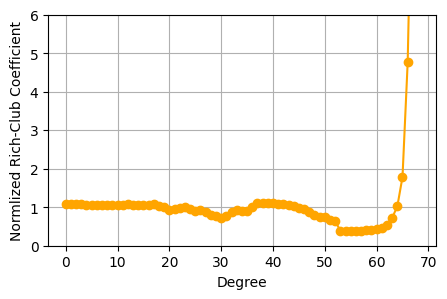

In [21]:
def rich_club_normalized(G, num_randomizations=100):
    """
    Compute the normalized rich-club coefficient of a graph G.

    Parameters:
    - G: NetworkX graph
    - num_randomizations: Number of randomized graphs to generate for averaging

    Returns:
    - normalized_rich_club_coeff: Dictionary keyed by degree with normalized rich-club coefficient values
    """
    # Compute the rich-club coefficients for the original graph
    original_phi = nx.rich_club_coefficient(G, normalized=False)

    # Initialize a dictionary to store the average rich-club coefficients for the randomized graphs
    phi_rand_sum = {k: 0 for k in original_phi.keys()}

    for _ in range(num_randomizations):
        # Create a configuration model graph to preserve the degree distribution
        random_graph = nx.configuration_model([d for n, d in G.degree()])

        # Remove parallel edges and self-loops
        random_graph = nx.Graph(random_graph)
        random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

        # Compute the rich-club coefficients for the randomized graph
        random_phi = nx.rich_club_coefficient(random_graph, normalized=False)

        # Accumulate the rich-club coefficients for averaging
        for k in random_phi.keys():
            phi_rand_sum[k] += random_phi[k]

    # Compute the average rich-club coefficients for the randomized graphs
    phi_rand_avg = {k: phi_rand_sum[k] / num_randomizations for k in phi_rand_sum.keys()}

    # Normalize the rich-club coefficients, avoiding division by zero
    normalized_rich_club_coeff = {}
    for k in original_phi.keys():
        if phi_rand_avg[k] != 0:
            normalized_rich_club_coeff[k] = original_phi[k] / phi_rand_avg[k]
        else:
            normalized_rich_club_coeff[k] = float('inf')  # or you can choose to skip these degrees

    return normalized_rich_club_coeff



# Step 1: Compute the Rich-Club Coefficients
G_undirected = G.to_undirected()
rich_club_coefficient = rich_club_normalized(G_undirected)

# Step 2: Plot the Rich-Club Coefficient
degrees = list(rich_club_coefficient.keys())
coefficients = list(rich_club_coefficient.values())

plt.figure(figsize=(5,3))
plt.plot(degrees, coefficients, marker='o', linestyle='-', color='orange')
plt.ylim(0,6)
plt.xlabel('Degree')
plt.ylabel('Normlized Rich-Club Coefficient')
plt.grid(True)
plt.show()



The first degree for which the rich-club coefficient is larger than 1.3 is: 65

Rich-club nodes (degree >= 65):
 [2, 12, 44]


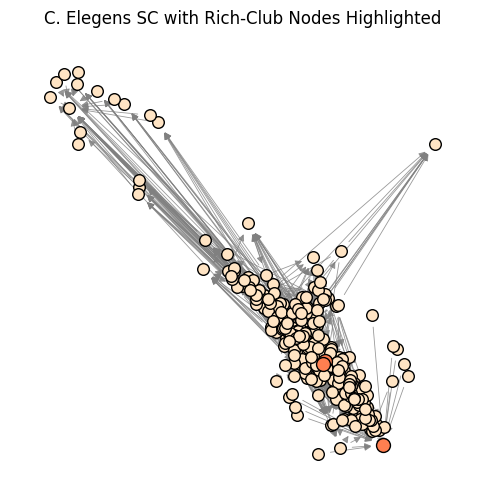

In [22]:
# Step 3: Identify the first degree for which the coefficient is larger than 1.3
for degree, coefficient in zip(degrees, coefficients):
    if coefficient > 1.3:
        print(f"The first degree for which the rich-club coefficient is larger than 1.3 is: {degree}")
        break


# Step 4: Identify Rich-Club Nodes
degree_threshold = degree # Select a degree threshold, for example, where the rich-club coefficient significantly increases
rich_club_nodes = [node for node, degree in dict(G.degree()).items() if degree >= degree_threshold]

print(f"\nRich-club nodes (degree >= {degree_threshold}):\n", rich_club_nodes)

# Step 5: Plot the original graph with spring layout and highlight the rich-club nodes
# Plot the graph with force-directed info
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=70, node_color='bisque', edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey', width=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=rich_club_nodes, node_size=100, node_color='coral', edgecolors='black', linewidths=1)

plt.title('C. Elegens SC with Rich-Club Nodes Highlighted')
plt.axis('off')
plt.show()


### **3.8 Modularity**
   - **Definition**: Modularity quantifies the degree to which the network may be subdivided into clearly defined groups or communities.
   - **Relevance**: High modularity indicates a structure with dense connections between the nodes within modules but sparse connections between nodes in different modules, suggesting specialized processing within tightly knit groups.
   - **Expectation**: High modularity is expected in brain connectomes, where functional segregation into distinct modules supports specialized processing and cognitive functions.
   - **Community Detection Algorithms**: There are many community (module) detection algorithms used to identify these modules within a graph ([Fortunato & Hric 2016](https://doi.org/10.1016/j.physrep.2016.09.002), [Betzel 2023](https://doi.org/10.1016/B978-0-323-85280-7.00016-6)). Two popular ones are:
     - **Greedy Modularity Communities**: This algorithm iteratively merges nodes or smaller communities to maximize modularity, stopping when no further merging increases the modularity score. It can be computationally intensive for large networks.
     - **Louvain Algorithm**: This efficient, two-phase method first assigns each node to its own community and optimizes modularity by moving nodes between communities. It then aggregates the network based on these communities and repeats the process. The algorithm stops when modularity no longer increases. The Louvain algorithm is faster and more scalable, particularly for large networks, due to its hierarchical approach.

In the code below, we generate and visualize two graphs with different levels of modularity using the Stochastic Block Model (SBM) implemented NetworkX, demonstrating how community structure affects modularity. SBM is a model for generating random graphs with a predefined community structure, where the probability of edge formation depends on the community membership of the nodes.

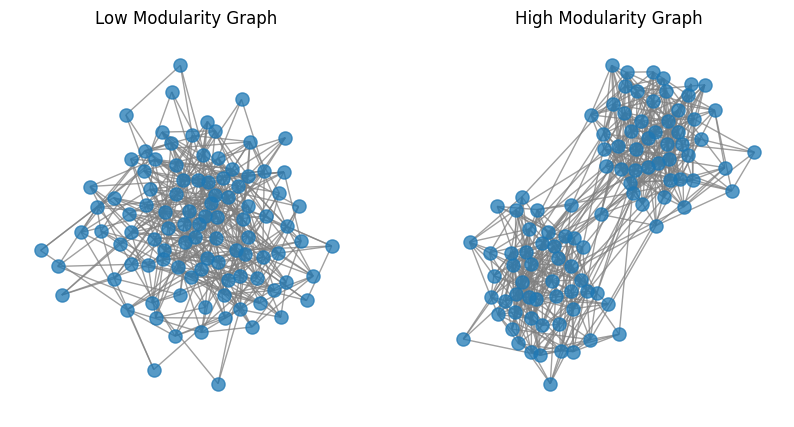

In [23]:
# Two graph generated randomly using SBM
# Define block sizes
n=100
sizes = [50, 50]

# Low modularity SBM graph
p_low = 0.08  # Probability of edges within communities
q_low = 0.08  # Probability of edges between communities
low_modularity_graph = nx.stochastic_block_model(sizes, [[p_low, q_low], [q_low, p_low]])

# High modularity SBM graph
p_high = 0.2
q_high = 0.02
high_modularity_graph = nx.stochastic_block_model(sizes, [[p_high, q_high], [q_high, p_high]])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Plot low modularity graph
pos = nx.spring_layout(low_modularity_graph)
nx.draw(low_modularity_graph, pos, ax=axs[0], with_labels=False, node_size=90, edge_color='grey', alpha=0.75)
axs[0].set_title(f'Low Modularity Graph')

# Plot high modularity graph
pos = nx.spring_layout(high_modularity_graph)
nx.draw(high_modularity_graph, pos, ax=axs[1], with_labels=False, node_size=90, edge_color='grey', alpha=0.75)
axs[1].set_title(f'High Modularity Graph')

plt.show()

We now test Louvain and Greedy algoritmms on these two synthetic graphs.

In [24]:
pip install python-louvain

Modularity for the Low modularity using louvain algorithm: 0.2903806451241884

Modularity for the High modularity using louvain algorithm: 0.42786477471875173



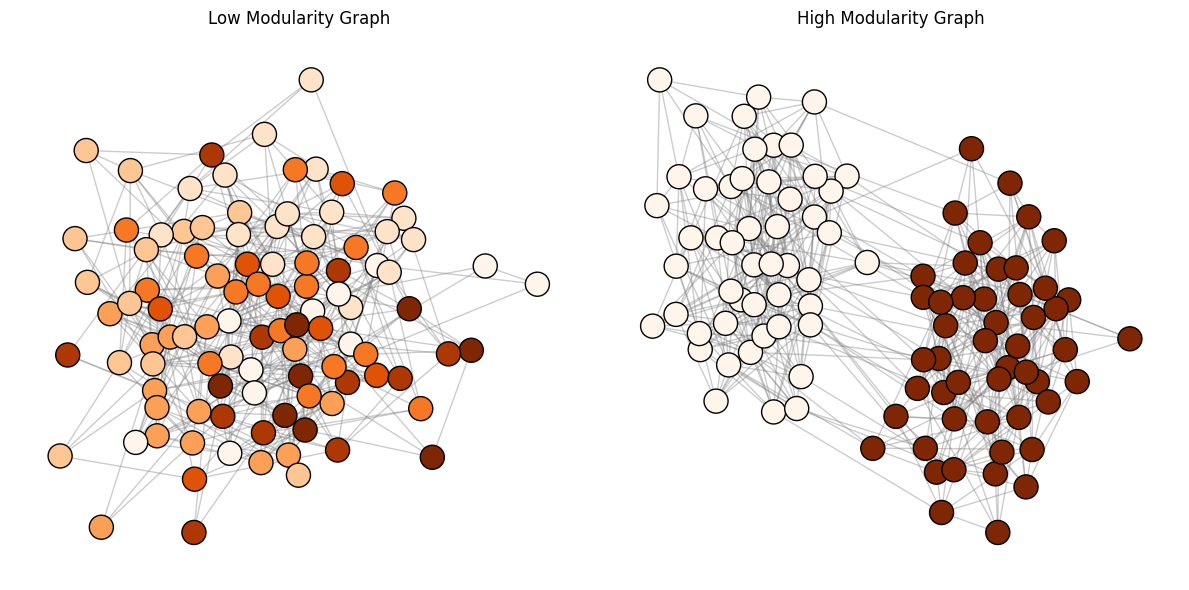

In [25]:
from networkx.algorithms import community
import community.community_louvain as community_louvain
import warnings

def visualize_modularity(G, title, ax, algorithm='greedy'):
    """
    Visualize the modularity and communities in a graph.

    Parameters:
    - G: NetworkX graph
    - title: str, the title for the graph
    - ax: Matplotlib axis for the graph visualization
    - algorithm: str, the algorithm to use for community detection ('greedy' or 'louvain')
    """
    if algorithm == 'greedy':
        # Identify communities using the greedy modularity communities algorithm
        communities = list(community.greedy_modularity_communities(G))
    elif algorithm == 'louvain':
        if G.is_directed():
            warnings.warn("The Louvain algorithm does not support directed graphs. Converting to undirected graph.")
            G = G.to_undirected()
        # Identify communities using the Louvain algorithm
        partition = community_louvain.best_partition(G)
        communities = {}
        for node, comm in partition.items():
            communities.setdefault(comm, []).append(node)
        communities = [frozenset(community) for community in communities.values()]
    else:
        raise ValueError("Unsupported algorithm. Use 'greedy' or 'louvain'.")

    # Compute modularity
    modularity = community.modularity(G, communities)
    print(f"Modularity for the {title} using {algorithm} algorithm: {modularity}\n")

    # Create a color map for the communities
    color_map = {}
    for i, community_set in enumerate(communities):
        for node in community_set:
            color_map[node] = i

    # Assign colors to nodes based on their community
    node_colors = [color_map[node] for node in G.nodes()]

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.3)

    # Draw nodes with community colors
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, cmap=plt.cm.Oranges, node_color=node_colors, edgecolors='black')

    # Draw all edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='grey', alpha=0.4)

    # Draw node labels
    # nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color='black')

    ax.axis('off')  # Hide the axes

    return modularity, node_colors



# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize modularity and communities for the low modularity graph
modularity, node_colors = visualize_modularity(low_modularity_graph, 'Low modularity', ax=axes[0], algorithm='louvain')
axes[0].set_title('Low Modularity Graph')

# Visualize modularity and communities for the high modularity graph
modularity, node_colors = visualize_modularity(high_modularity_graph, 'High modularity', ax=axes[1], algorithm='louvain')
axes[1].set_title('High Modularity Graph')

# Adjust layout
plt.tight_layout()
plt.show()





We're ready to compute the modularity for the C. elegans SC.

<ipython-input-25-1f3bac433936>:20: UserWarning: The Louvain algorithm does not support directed graphs. Converting to undirected graph.
  warnings.warn("The Louvain algorithm does not support directed graphs. Converting to undirected graph.")


Modularity for the C. elegans SC using louvain algorithm: 0.4737458927642109



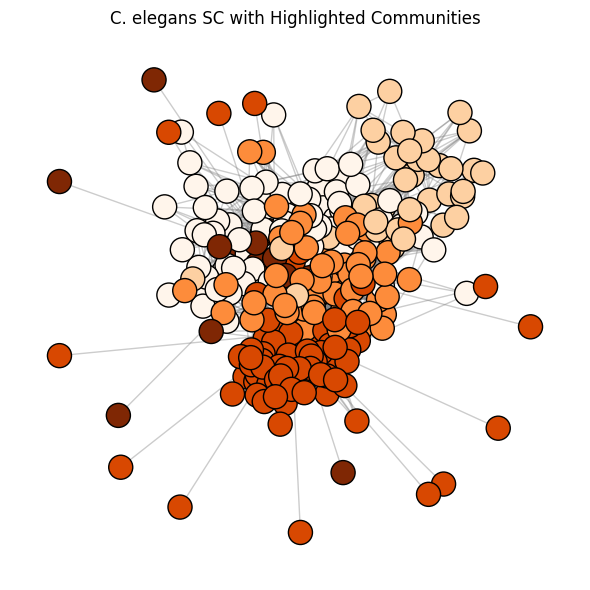

In [26]:
# Create subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Visualize modularity and communities
modularity, node_colors = visualize_modularity(G, 'C. elegans SC', ax=ax, algorithm='louvain')
plt.title('C. elegans SC with Highlighted Communities')
plt.tight_layout()
plt.show()


### **3.9 Singular Values and Effective Ranks**

As highlighted in a [recent study](https://www.nature.com/articles/s41567-023-02303-0), the singular values $\sigma_1,\ldots, \sigma_N$ of adjacency matrices in connectomics exhibit rapid decay, indicating a low effective rank.


Singular value decomposition (SVD) is used to compute these values in Python, typically through `numpy.linalg.svd`. The SVD equation is:
$$ A = U \Sigma V^T $$
where $A $ is the adjacency matrix, $ U $ is an orthogonal matrix of left singular vectors, $ \Sigma $ is a diagonal matrix of singular values $ \sigma_i $, and $V^T $is an orthogonal matrix of right singular vectors.

Below, we extract the adjacency matrix of graph $ G $ and compute its singular values. We compare these values with those obtained from randomly generated graphs that preserve the same degrees as $ G $ (using the configuration model). Our analysis reveals that while the singular values of the original graph decrease rapidly, they exhibit a distinct behavior compared to those of randomly generated graphs, highlighting the more complex structure inherent in the original graph.

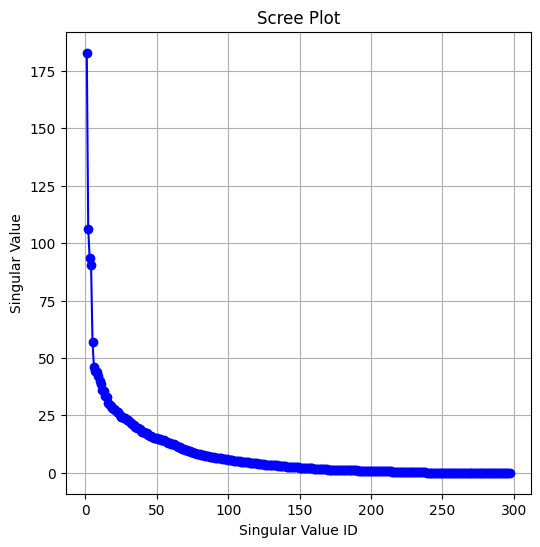

In [27]:
import numpy as np

# Step 1: Extract adjacency matrix
if nx.is_directed(G):
    adj_matrix = nx.to_numpy_array(G, weight='weight', dtype=np.float64)
else:
    adj_matrix = nx.to_numpy_array(G, weight=None, dtype=np.float64)

# Step 2: Compute singular values
singular_values = np.linalg.svd(adj_matrix, compute_uv=False)

# Plot the scree plot
plt.figure(figsize=(6,6))
plt.plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Singular Value ID')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

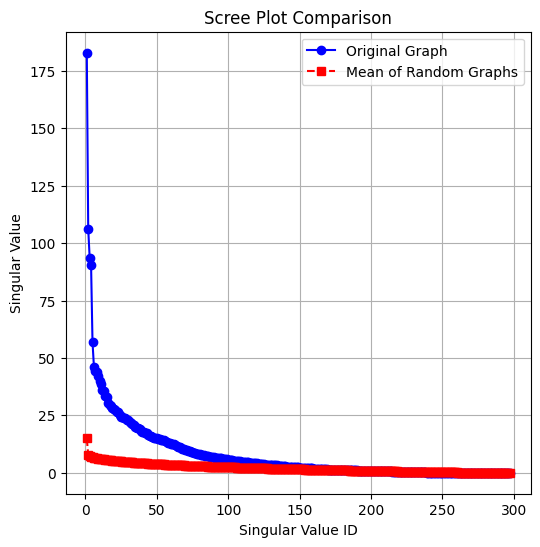

In [28]:

def generate_random_graph_svd(G, num_random_graphs=100):
    """Generate random graphs from configuration model and compute their singular values."""
    singular_values_list = []

    for _ in range(num_random_graphs):
        if nx.is_directed(G):
            # Extract in-degree and out-degree sequences
            in_degree_sequence = [d for n, d in G.in_degree()]
            out_degree_sequence = [d for n, d in G.out_degree()]

            G_random = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence, create_using=nx.DiGraph())
        else:
            # Extract degree sequence for undirected graph
            degree_sequence = [d for n, d in G.degree()]

            G_random = nx.configuration_model(degree_sequence, create_using=nx.Graph())

        # Extract adjacency matrix
        adj_matrix_random = nx.to_numpy_array(G_random, weight='weight' if G.is_directed() else None, dtype=np.float64)

        # Compute singular values and collect them
        singular_values = np.linalg.svd(adj_matrix_random, compute_uv=False)
        singular_values_list.append(singular_values)

    # Compute mean of singular values across all random graphs
    mean_singular_values = np.mean(singular_values_list, axis=0)
    return mean_singular_values

# Step 3: Generate random graphs and compute mean singular values (defaulting to 100 random graphs)
mean_singular_values = generate_random_graph_svd(G, num_random_graphs=100)


# Plotting
plt.figure(figsize=(6, 6))

# Plot original graph's scree plot
plt.plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-', color='b', label='Original Graph')

# Plot mean scree plot of random graphs
plt.plot(range(1, len(mean_singular_values) + 1), mean_singular_values, marker='s', linestyle='--', color='r', label='Mean of Random Graphs')

plt.title('Scree Plot Comparison')
plt.xlabel('Singular Value ID')
plt.ylabel('Singular Value')
plt.legend()
plt.grid(True)
plt.show()

We now compute some effective ranks and show that they are all much smaller than the actual rank.

In [29]:
def computeRank(singularValues, tolerance=1e-13):
    return len(singularValues[singularValues > tolerance])


def computeERank(singularValues, tolerance=1e-13):
    """Effective rank based on the definition using spectral entropy
     (https://ieeexplore.ieee.org/document/7098875
      and doi:10.1186/1745-6150-2-2). """
    # We use the convention 0*log(0)=0 so we remove the zero singular values
    singularValues = singularValues[singularValues > tolerance]
    normalizedSingularValues = singularValues / np.sum(singularValues)
    return np.exp(-np.sum(normalizedSingularValues
                          * np.log(normalizedSingularValues)))


def findEffectiveRankElbow(singularValues):
    """Effective rank based on the elbow method."""
    # Coordinates of the diagonal line y = 1 - x  using ax + by + c = 0.
    a, b, c = 1, 1, -1

    # Define normalized axis with first SV at (0,1) and last SV at (1,0).
    x = np.linspace(0, 1, num=len(singularValues))
    y = (singularValues - np.min(singularValues)) /\
        (np.max(singularValues) - np.min(singularValues))

    # See https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
    # Line_defined_by_an_equation
    # Distance between the diagonal line y = 1 - x, passing through the
    # largest and the smallest singular value, and the position (x_i, y_i)
    # of the i-th singular value
    distanceToDiagonal = np.abs(a*x + b*y + c) / np.sqrt(a**2 + b**2)

    # Returns the index of the largest distance (rank must be larger than 0).
    elbowPosition = np.argmax(distanceToDiagonal) + 1  # + 1 for indices
    return elbowPosition - 1
    # - 1 to have the effective rank/nb of significant singvals


def computeEffectiveRankEnergyRatio(singularValues, threshold=0.9):
    """Effective rank based on the energy ratio."""
    normalizedCumulSquaredSingularValues = np.cumsum(np.square(singularValues))
    normalizedCumulSquaredSingularValues /= \
        normalizedCumulSquaredSingularValues[-1]
    # Below, this is the min of the argmax. See the note in the documentation
    # of np.argmax: "In case of multiple occurrences of the maximum values,
    # the indices corresponding to the first occurrence are returned."
    return np.argmax(normalizedCumulSquaredSingularValues > threshold) + 1


def computeStableRank(singularValues):
    return np.sum(singularValues*singularValues) / np.max(singularValues)**2


def computeNuclearRank(singularValues):
    return np.sum(singularValues) / np.max(singularValues)



# Compute and print various effective ranks
print("Rank:", computeRank(singular_values))
print("Effective Rank (Entropy):", computeERank(singular_values))
print("Effective Rank (Elbow):", findEffectiveRankElbow(singular_values))
print("Effective Rank (Energy Ratio):", computeEffectiveRankEnergyRatio(singular_values))
print("Stable Rank:", computeStableRank(singular_values))
print("Nuclear Rank:", computeNuclearRank(singular_values))

Rank: 248
Effective Rank (Entropy): 103.30943508119324
Effective Rank (Elbow): 23
Effective Rank (Energy Ratio): 35
Stable Rank: 3.0859009361912646
Nuclear Rank: 13.226080583953257


### **3.10 Exercises**
Perform the previous analysis for the structural connectomes of the mouse and  the larval drosophila.



##### **Mesoscale SC of the mouse brain**

The mesoscopic connectome of the mouse, as mapped by the Allen Institute and reported by ([Oh et al. 2014](https://doi.org/10.1038/nature13186)), provides a detailed and high-resolution map of neural connections. It features 426 nodes (or 213 nodes, representing symmetric pairs of brain regions) and 8820 directed edges, highlighting both low-degree and high-degree nodes. The study found that nodes with lower degrees had higher clustering coefficients and identified a power-law relationship between these properties. Using this data, a generative model was developed based on proximal attachment and source growth principles, successfully replicating the structural features of the connectome, indicating the importance of spatial embedding and node growth in brain connectivity.

In [30]:
import urllib.request

# URL of the text file
url = "https://github.com/VinceThi/low-rank-hypothesis-complex-systems/raw/v1.0.0/graphs/graph_data/connectomes/ABA_weight_mouse.txt"

# Load the data from the URL into a numpy array
with urllib.request.urlopen(url) as f:
    adj_matrix = np.loadtxt(f).astype(float)

# Create a directed graph from the matrix (assuming it represents connectivity)
G_mouse = nx.DiGraph(adj_matrix)

# Example: Print basic graph information
print(f"Number of nodes: {G_mouse.number_of_nodes()}")
print(f"Number of edges: {G_mouse.number_of_edges()}")
print(f"Density: {nx.density(G_mouse)}")
print(f"Weakly connected: {nx.is_weakly_connected(G_mouse)}")
print(f"Strongly connected: {nx.is_strongly_connected(G_mouse)}")

Number of nodes: 213
Number of edges: 1947
Density: 0.043117193728408186
Weakly connected: True
Strongly connected: False


##### **Microscopic SC of the larval drosophila**

A complete brain connectome of the larva of the fruit fly Drosophila melanogaster as recently published in [this paper]( https://doi.org/10.1126/science.add9330). Nodes are neurons and edges are synaptic connections.

In [31]:
import requests     # For making HTTP requests, used here to download the ZIP file from a URL
import zipfile      # For handling ZIP files, used here to extract contents from the downloaded ZIP file
import io           # Provides core tools for working with streams of data, used here for handling file content as a string
import pandas as pd # Provides data structures and data analysis tools, used here to work with tabular data (DataFrame)


# URL of the ZIP file
zip_url = "https://networks.skewed.de/net/fly_larva/files/fly_larva.csv.zip"

# Download the ZIP file
response = requests.get(zip_url)

# Check if the download was successful
if response.status_code == 200:
    # Extract the contents of the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # Check if 'edges.csv' exists in the ZIP file
        if 'edges.csv' in zf.namelist():
            # Open 'edges.csv' and read it into a Pandas DataFrame
            with zf.open('edges.csv') as csv_file:
                # Read CSV content as string
                csv_content = csv_file.read().decode('utf-8')

                # Split into lines
                lines = csv_content.splitlines()

                # Remove '# ' from the beginning of the first line
                if lines[0].startswith('# '):
                    lines[0] = lines[0][2:]

                # Join lines back into a single string
                csv_content_processed = '\n'.join(lines)

                # Read processed CSV content into DataFrame
                df_edges = pd.read_csv(io.StringIO(csv_content_processed), skipinitialspace=True)

                # Rename columns to remove leading spaces or characters
                df_edges.rename(columns={'# source': 'source', ' target': 'target', ' value': 'value'}, inplace=True)

        else:
            print("edges.csv not found in the ZIP file.")
else:
    print(f"Failed to download ZIP file. Status code: {response.status_code}")

# Display the DataFrame to verify
df_edges

,source,target,count,etype
0,0,1,1,da
1,0,2,1,da
2,0,3,1,da
3,0,4,3,da
4,0,5,1,da
...,...,...,...,...
116917,2951,1431,2,ad
116918,2951,553,1,ad
116919,2951,1749,2,ad
116920,2951,2227,3,ad


In [32]:
# Create a directed graph (DiGraph)
G_drosophila = nx.DiGraph()

# Add edges from DataFrame
for _, row in df_edges.iterrows():
    source = int(row['source'])  # Convert to int assuming nodes are represented as integers
    target = int(row['target'])  # Convert to int assuming nodes are represented as integers
    weight = float(row['count'])  # Convert to float assuming weights are represented as floats

    G_drosophila.add_edge(source, target, weight=weight)

# Count nodes and edges, measure density
num_nodes = G_drosophila.number_of_nodes()
num_edges = G_drosophila.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 2952
Number of edges: 110677


## <font color="blue"> **4. Functional Connectomes** </font>

Functional connectomes are comprehensive maps that illustrate the functional connections between different elements within the brain, whether they are neurons, groups of neurons, or large brain regions. These maps detail how different parts of the brain interact and coordinate activity, providing a dynamic framework for understanding brain function and communication.




### **4.1 Relationship with Graphs**
Functional connectomes are commonly represented as **graphs** in the field of network neuroscience. In this representation:

- **Vertices** (or nodes) represent the functional components of the brain, such as individual neurons, clusters of neurons, or whole brain regions, depending on the scale of the connectome.
- **Edges** (or links) represent the functional connections between these nodes, typically assessed by measures of statistical dependence, such as **Pearson correlation**. Pearson correlation quantifies the degree to which the activity patterns of two nodes co-vary over time, indicating the strength of their functional connectivity.

### **4.2 Simulated activity on the mesoscale mouse connectome**

#### **Structural information**



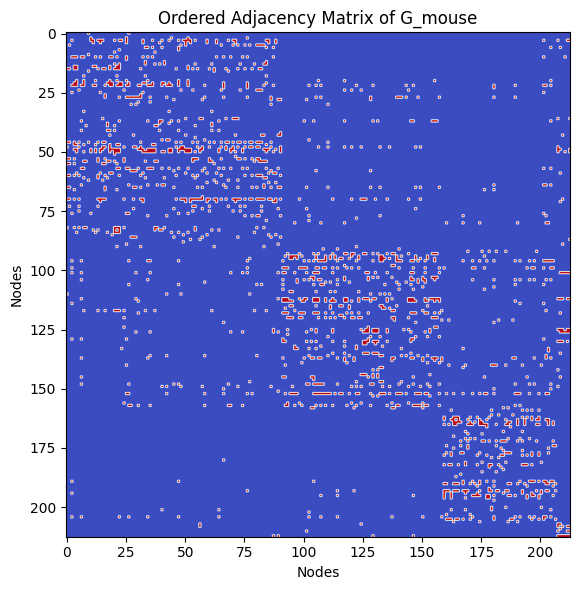

In [33]:
# Extract adjacency matrix including weights
adj_matrix = nx.to_numpy_array(G_mouse, weight='weight')

# Find communities using greedy modularity method
communities = list(nx.algorithms.community.greedy_modularity_communities(G_mouse))

# Map nodes to their community index
node_community = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_community[node] = idx


# Reorder adjacency matrix based on community membership
comm_order = np.argsort([node_community[node] for node in G_mouse.nodes()])
W = adj_matrix[comm_order][:, comm_order]

# Visualize the adjacency matrix
plt.figure(figsize=(6, 6))
plt.imshow(W>0, cmap='coolwarm', origin='upper')
plt.title('Ordered Adjacency Matrix of G_mouse')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.tight_layout()
plt.show()

#### **Dynamical model**

We propose a noisy linear activity model describing a system where nodes interact through a weighted connectivity matrix $ W $. Each node's activity evolves over time, influenced by its current state, interactions with other nodes governed by $ W $, an external coupling strength $ g $, and stochastic noise. This model is mathematically represented by a stochastic differential equation (SDE):
$$ \frac{d\mathbf{x}(t)}{dt} = -\mathbf{x}(t) + g \, W \,\mathbf{x}(t) + \sqrt{2\sigma} \, B'(t) $$
where:
- $ \mathbf{x}(t) $ represents the vector of activities of all nodes at time $ t $.
- $ W $ is the weight matrix specifying the network connections and strengths.
- $ g $ scales the influence of network interactions on node activities.
- $ \sigma $ controls the standard deviation of the stochastic noise affecting the system.
- $ B'(t) $ denotes the derivative of a Wiener process (Brownian motion), introducing random fluctuations, which is typically represented as white noise with mean zero and variance $dt$.

To integrate this equation numerically, typically over discrete time steps, we use the Euler-Maruyama method. This integration process provides a numerical approximation of how node activities evolve over time, capturing the interplay between network structure, coupling strength, and stochastic effects in the system.

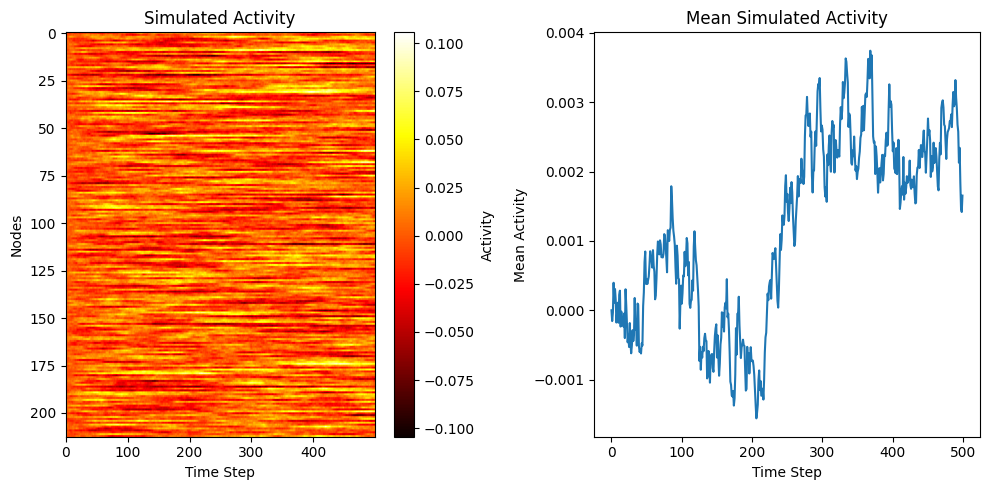

In [34]:
def integrate_noisy_linear_activity_model(W, g=0.0, sigma=0.1, T=1000, dt=0.01):
    """
    Integrates the noisy linear activity model over time.

    Parameters:
    - W: numpy array, shape (N, N)
         Weight matrix representing connectivity between N nodes.
    - g: float, optional
         Coupling strength parameter (default is 0.0).
    - sigma: float, optional
         Noise standard deviation (default is 0.1).
    - T: int, optional
         Number of time steps (default is 1000).
    - dt: float, optional
         Time step size (default is 0.01).

    Returns:
    - X: numpy array, shape (N, T)
         Matrix of time series data where each row corresponds to the activity of a node over time.
    """
    N = W.shape[0]  # number of nodes

    # Initialize the timeseries matrix
    X = np.zeros((N, T))

    # Simulate the timeseries
    for t in range(T-1):
        X[:, t+1] = X[:, t] + dt*(-X[:, t] + g * W @ X[:, t]) + np.sqrt(dt)*np.random.normal(0, sigma, N)

    return X


# Define parameters
g = 0.0  # example coupling strength
sigma = 0.04  # example noise standard deviation
T = 500  # example number of time steps
dt = 0.01  # example time step size

# Integrate the model
X = integrate_noisy_linear_activity_model(W, g=g, sigma=sigma, T=T, dt=dt)

# Plotting side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the time series as a heatmap
im = axs[0].imshow(X, cmap='hot', aspect='auto')
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('Nodes')
axs[0].set_title('Simulated Activity')
fig.colorbar(im, ax=axs[0], label='Activity')

# Plot the mean activity
axs[1].plot(X.mean(axis=0))
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Mean Activity')
axs[1].set_title('Mean Simulated Activity')

plt.tight_layout()
plt.show()



#### **Functional connectome extraction**

To extract a **functional connectome (FC)** from time series data matrix $ N\times T $, where $N$ is the number of nodes and $T$ is the number of time steps, Pearson correlation coefficients are computed between each pair of nodes. These coefficients form an $N\times N$ matrix that quantifies the strength of functional connectivity between nodes, providing insights into network interactions over time. Visualization and analysis of this connectome help characterize network dynamics and organization in complex systems like brain networks.

To assess the **structure-function coupling**, we can calculate the Pearson correlation between the vectorized forms of the structural connectivity (SC) and functional connectivity (FC) matrices. This correlation quantifies how closely the anatomical connections align with the dynamic functional interactions within the network.

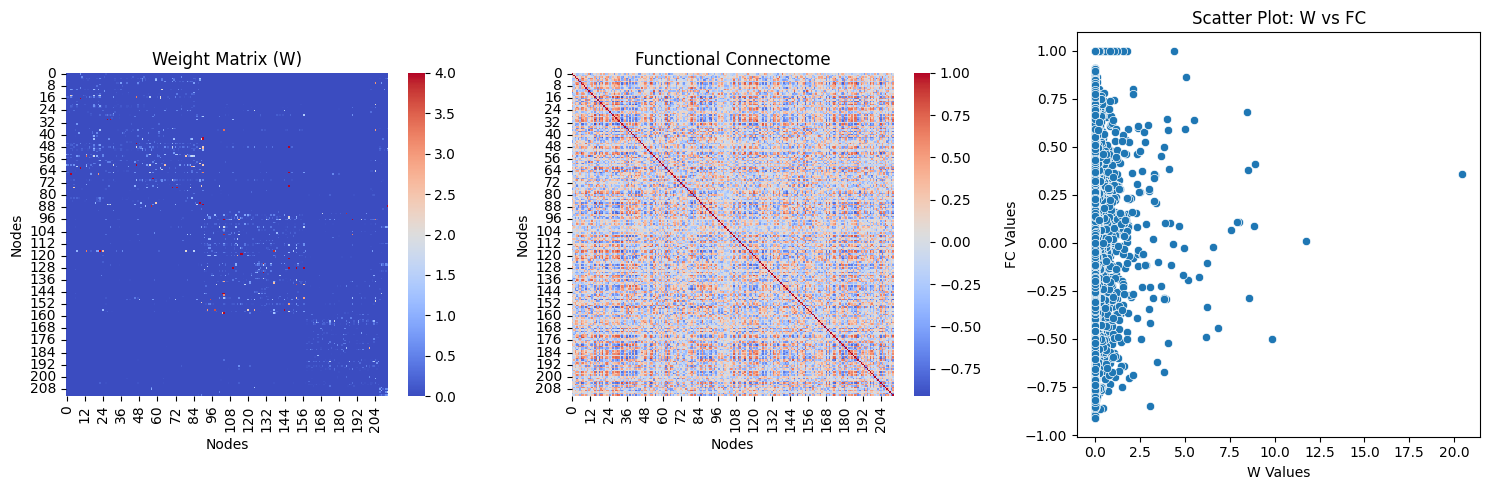

In [35]:
# Compute the correlation coefficient matrix (function connectome) from X
FC = np.corrcoef(X)

# Plotting side by side
fig, axs = plt.subplots(1, 3, figsize=(15,5))

import seaborn as sns
# Plot W
sns.heatmap(W, ax=axs[0], cmap='coolwarm', cbar=True, vmin=0, vmax=4.0,
            square=True, cbar_kws={'shrink': 0.8})
axs[0].set_title('Weight Matrix (W)')
axs[0].set_xlabel('Nodes')
axs[0].set_ylabel('Nodes')

# Plot connectome
sns.heatmap(FC, ax=axs[1], cmap='coolwarm', cbar=True, square=True,
            cbar_kws={'shrink': 0.8})
axs[1].set_title('Functional Connectome')
axs[1].set_xlabel('Nodes')
axs[1].set_ylabel('Nodes')

# Plot scatter plot between W and FC values
W_values = W.flatten()
FC_values = FC.flatten()
sns.scatterplot(x=W_values, y=FC_values, ax=axs[2])
axs[2].set_title('Scatter Plot: W vs FC')
axs[2].set_xlabel('W Values')
axs[2].set_ylabel('FC Values')

plt.tight_layout()
plt.show()


Why no structure appears in the functional connectome? Please increase g (e.g. g=0.32) to see what happens.

To comprehensively capture the system's behavior, especially its variability due to stochastic factors like noise and initial conditions, it's advantageous to perform multiple simulations of the activity. By computing correlation matrices for each simulation and averaging them, we obtain a more robust functional connectivity assessment (FC).

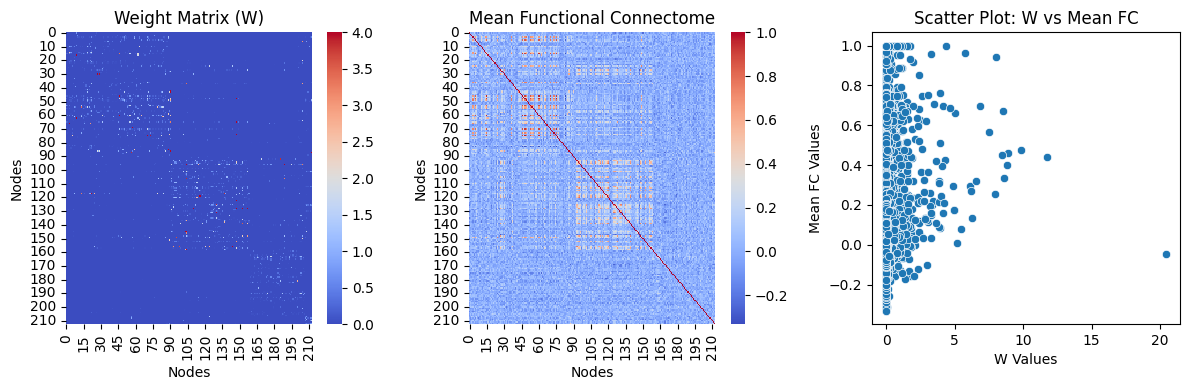

Structure-Function coupling (Pearson): 0.16386308818662984
P-value: 1.6737271634773717e-270


In [36]:

# Define parameters
g = 0.4  # example coupling strength
sigma = 0.04  # example noise standard deviation
T = 400  # example number of time steps
dt = 0.01  # example time step size
num_simulations = 30  # number of simulations

# Initialize an empty list to store correlation matrices
correlations = []

# Simulate activity and compute correlations for each simulation
for _ in range(num_simulations):
    # Integrate the model
    X = integrate_noisy_linear_activity_model(W, g=g, sigma=sigma, T=T, dt=dt)

    # Compute the correlation coefficient matrix from X
    FC = np.corrcoef(X)

    # Store the correlation coefficient matrix
    correlations.append(FC)

# Compute the mean correlation coefficient matrix across all simulations
mean_correlation = np.mean(correlations, axis=0)

# Plotting side by side
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot W
sns.heatmap(W, ax=axs[0], cmap='coolwarm', cbar=True, vmin=0, vmax=4.0)
axs[0].set_title('Weight Matrix (W)')
axs[0].set_xlabel('Nodes')
axs[0].set_ylabel('Nodes')

# Plot mean connectome
sns.heatmap(mean_correlation, ax=axs[1], cmap='coolwarm', cbar=True)
axs[1].set_title('Mean Functional Connectome')
axs[1].set_xlabel('Nodes')
axs[1].set_ylabel('Nodes')

# Flatten W and mean_correlation for scatter plot
W_values = W.flatten()
mean_correlation_values = mean_correlation.flatten()

# Plot scatter plot between W and mean_correlation values
sns.scatterplot(x=W_values, y=mean_correlation_values, ax=axs[2])
axs[2].set_title('Scatter Plot: W vs Mean FC')
axs[2].set_xlabel('W Values')
axs[2].set_ylabel('Mean FC Values')

plt.tight_layout()
plt.show()

from scipy.stats import pearsonr
# Compute the Structure-Functin coupling as a Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(W_values, mean_correlation_values)

# Print correlation coefficient and p-value
print(f"Structure-Function coupling (Pearson): {corr_coef}")
print(f"P-value: {p_value}")


Does the structure function coupling always increase with $g$? Explain why.

## <font color="blue"> **5. Complementary References** </font>



- All built-in NetworkX functions with tutorials: [NetworkX web page](https://networkx.org/)
- A more advanced Python package for graphs is [graph-tool](https://graph-tool.skewed.de/), which is associated with the network catalog and repository [Netzschleuder](https://networks.skewed.de/), where you can find thousands of publicly available graphs derived from real data.
- The Brain Connectivity Toolbox MATLAB codebase ([Brain Connectivity Toolbox](https://sites.google.com/site/bctnet/home?authuser=0)) is widely utilized by brain imaging researchers.
   * This reference provides additional discussion and detail: [Complex network measures of brain connectivity: Uses and interpretations](https://www.sciencedirect.com/science/article/abs/pii/S105381190901074X)
   * A list of graph measures with brief descriptions and the types of compatible associated networks is available here: [List of measures](https://sites.google.com/site/bctnet/list-of-measures?authuser=0)
   * All the brain connectivity measures are implemented in Python and can be found in the following GitHub repository: [bctpy](https://github.com/aestrivex/bctpy)

- There exist dozens of methods to infer functional connectivity beyond Pearson correlation, including Granger Causality and Transfer Entropy. Most methods are now implemented in the Python package [pyspi](https://github.com/DynamicsAndNeuralSystems/pyspi)